In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


## Base de dados

https://brasil.mapbiomas.org/en/estatisticas/

https://brasil.mapbiomas.org/wp-content/uploads/sites/4/2024/08/MAPBIOMAS_BRAZIL-COL.9-LEGAL_AMAZON.xlsx 

In [2]:
## carregando os dados, como importamos excel, podemos selecionar qual planilha desejamos com o termo 'sheet_name'

cobertura = pd.read_excel(r"C:\Users\gabri\Documents\FEA.dev\Amazonia\dados_amazonia.xlsx", sheet_name = 'PIVOT_COVERAGE')

display(cobertura)

,Rótulos de Linha,Soma de 1985,Soma de 1986,Soma de 1987,Soma de 1988,Soma de 1989,Soma de 1990,Soma de 1991,Soma de 1992,Soma de 1993,...,Soma de 2014,Soma de 2015,Soma de 2016,Soma de 2017,Soma de 2018,Soma de 2019,Soma de 2020,Soma de 2021,Soma de 2022,Soma de 2023
0,1. Forest,4.378160e+08,4.356900e+08,4.337349e+08,4.317629e+08,4.298394e+08,4.287771e+08,4.272262e+08,4.248479e+08,4.226003e+08,...,3.817299e+08,3.804518e+08,3.791452e+08,3.781753e+08,3.772887e+08,3.758082e+08,3.743586e+08,3.721424e+08,3.696280e+08,3.668505e+08
1,1.1. Forest Formation,3.528515e+08,3.515702e+08,3.500267e+08,3.485561e+08,3.473434e+08,3.467265e+08,3.456950e+08,3.439611e+08,3.424105e+08,...,3.106747e+08,3.098306e+08,3.088663e+08,3.081208e+08,3.073816e+08,3.061769e+08,3.050470e+08,3.032507e+08,3.014441e+08,2.992705e+08
2,1.2. Savanna Formation,4.218181e+07,4.154699e+07,4.127596e+07,4.094000e+07,4.051578e+07,4.003241e+07,3.963565e+07,3.914245e+07,3.860672e+07,...,3.046732e+07,3.007839e+07,2.981204e+07,2.961854e+07,2.945082e+07,2.924007e+07,2.894744e+07,2.867049e+07,2.828138e+07,2.759329e+07
3,1.4 Floodable Forest,4.207644e+07,4.186603e+07,4.172691e+07,4.155815e+07,4.126808e+07,4.130158e+07,4.117682e+07,4.102580e+07,4.086452e+07,...,3.987100e+07,3.983034e+07,3.975586e+07,3.972616e+07,3.974638e+07,3.967888e+07,3.965536e+07,3.950786e+07,3.918856e+07,3.926494e+07
4,1.3. Mangrove,7.062720e+05,7.067923e+05,7.053193e+05,7.086602e+05,7.121778e+05,7.166338e+05,7.186841e+05,7.186290e+05,7.185722e+05,...,7.168245e+05,7.125495e+05,7.109835e+05,7.097661e+05,7.099600e+05,7.123536e+05,7.087884e+05,7.133017e+05,7.139529e+05,7.217784e+05
5,1.3. Mangrove,7.062720e+05,7.067923e+05,7.053193e+05,7.086602e+05,7.121778e+05,7.166338e+05,7.186841e+05,7.186290e+05,7.185722e+05,...,7.168245e+05,7.125495e+05,7.109835e+05,7.097661e+05,7.099600e+05,7.123536e+05,7.087884e+05,7.133017e+05,7.139529e+05,7.217784e+05
6,1.3. Mangrove,7.062720e+05,7.067923e+05,7.053193e+05,7.086602e+05,7.121778e+05,7.166338e+05,7.186841e+05,7.186290e+05,7.185722e+05,...,7.168245e+05,7.125495e+05,7.109835e+05,7.097661e+05,7.099600e+05,7.123536e+05,7.087884e+05,7.133017e+05,7.139529e+05,7.217784e+05
7,2. Non Forest Natural Formation,2.783835e+07,2.720550e+07,2.679853e+07,2.657288e+07,2.666987e+07,2.648475e+07,2.594611e+07,2.636088e+07,2.589884e+07,...,2.629030e+07,2.651025e+07,2.689241e+07,2.646198e+07,2.645077e+07,2.649209e+07,2.676258e+07,2.663066e+07,2.549123e+07,2.549137e+07
8,2.1. Wetland,1.639207e+07,1.516224e+07,1.492392e+07,1.508850e+07,1.541080e+07,1.472982e+07,1.444745e+07,1.421698e+07,1.441316e+07,...,1.518027e+07,1.513083e+07,1.543246e+07,1.523760e+07,1.544934e+07,1.510942e+07,1.460842e+07,1.448607e+07,1.383963e+07,1.432620e+07
9,2.2. Grassland,1.053550e+07,1.113082e+07,1.096223e+07,1.057248e+07,1.035161e+07,1.084838e+07,1.059074e+07,1.123542e+07,1.057535e+07,...,1.020355e+07,1.047325e+07,1.055385e+07,1.031906e+07,1.009732e+07,1.048012e+07,1.125228e+07,1.124279e+07,1.074799e+07,1.026441e+07


## Data Cleaning
   - Remover linhas duplicadas
   - Selecionar os dados desejados

In [3]:
# Removendo repitidos
cobertura = cobertura.drop_duplicates()

# Reset do index
cobertura = cobertura.reset_index(drop=True)


display(cobertura)


,Rótulos de Linha,Soma de 1985,Soma de 1986,Soma de 1987,Soma de 1988,Soma de 1989,Soma de 1990,Soma de 1991,Soma de 1992,Soma de 1993,...,Soma de 2014,Soma de 2015,Soma de 2016,Soma de 2017,Soma de 2018,Soma de 2019,Soma de 2020,Soma de 2021,Soma de 2022,Soma de 2023
0,1. Forest,4.378160e+08,4.356900e+08,4.337349e+08,4.317629e+08,4.298394e+08,4.287771e+08,4.272262e+08,4.248479e+08,4.226003e+08,...,3.817299e+08,3.804518e+08,3.791452e+08,3.781753e+08,3.772887e+08,3.758082e+08,3.743586e+08,3.721424e+08,3.696280e+08,3.668505e+08
1,1.1. Forest Formation,3.528515e+08,3.515702e+08,3.500267e+08,3.485561e+08,3.473434e+08,3.467265e+08,3.456950e+08,3.439611e+08,3.424105e+08,...,3.106747e+08,3.098306e+08,3.088663e+08,3.081208e+08,3.073816e+08,3.061769e+08,3.050470e+08,3.032507e+08,3.014441e+08,2.992705e+08
2,1.2. Savanna Formation,4.218181e+07,4.154699e+07,4.127596e+07,4.094000e+07,4.051578e+07,4.003241e+07,3.963565e+07,3.914245e+07,3.860672e+07,...,3.046732e+07,3.007839e+07,2.981204e+07,2.961854e+07,2.945082e+07,2.924007e+07,2.894744e+07,2.867049e+07,2.828138e+07,2.759329e+07
3,1.4 Floodable Forest,4.207644e+07,4.186603e+07,4.172691e+07,4.155815e+07,4.126808e+07,4.130158e+07,4.117682e+07,4.102580e+07,4.086452e+07,...,3.987100e+07,3.983034e+07,3.975586e+07,3.972616e+07,3.974638e+07,3.967888e+07,3.965536e+07,3.950786e+07,3.918856e+07,3.926494e+07
4,1.3. Mangrove,7.062720e+05,7.067923e+05,7.053193e+05,7.086602e+05,7.121778e+05,7.166338e+05,7.186841e+05,7.186290e+05,7.185722e+05,...,7.168245e+05,7.125495e+05,7.109835e+05,7.097661e+05,7.099600e+05,7.123536e+05,7.087884e+05,7.133017e+05,7.139529e+05,7.217784e+05
5,2. Non Forest Natural Formation,2.783835e+07,2.720550e+07,2.679853e+07,2.657288e+07,2.666987e+07,2.648475e+07,2.594611e+07,2.636088e+07,2.589884e+07,...,2.629030e+07,2.651025e+07,2.689241e+07,2.646198e+07,2.645077e+07,2.649209e+07,2.676258e+07,2.663066e+07,2.549123e+07,2.549137e+07
6,2.1. Wetland,1.639207e+07,1.516224e+07,1.492392e+07,1.508850e+07,1.541080e+07,1.472982e+07,1.444745e+07,1.421698e+07,1.441316e+07,...,1.518027e+07,1.513083e+07,1.543246e+07,1.523760e+07,1.544934e+07,1.510942e+07,1.460842e+07,1.448607e+07,1.383963e+07,1.432620e+07
7,2.2. Grassland,1.053550e+07,1.113082e+07,1.096223e+07,1.057248e+07,1.035161e+07,1.084838e+07,1.059074e+07,1.123542e+07,1.057535e+07,...,1.020355e+07,1.047325e+07,1.055385e+07,1.031906e+07,1.009732e+07,1.048012e+07,1.125228e+07,1.124279e+07,1.074799e+07,1.026441e+07
8,2.4. Rocky Outcrop,8.796456e+05,8.812421e+05,8.811695e+05,8.810836e+05,8.810016e+05,8.809367e+05,8.808904e+05,8.808145e+05,8.807356e+05,...,8.790708e+05,8.789982e+05,8.790174e+05,8.790492e+05,8.790391e+05,8.790457e+05,8.790452e+05,8.787179e+05,8.797517e+05,8.770335e+05
9,2.3. Hypersaline Tidal Flat,3.113903e+04,3.119818e+04,3.121149e+04,3.082246e+04,2.645385e+04,2.560554e+04,2.703006e+04,2.766159e+04,2.960322e+04,...,2.740683e+04,2.717543e+04,2.708354e+04,2.627454e+04,2.507037e+04,2.351340e+04,2.283956e+04,2.308774e+04,2.385729e+04,2.372943e+04


## Avanço da fronteira agrícola

In [4]:
# Seleciona as linhas para um novo df sobre agricultura
agricola = cobertura.iloc[10:21].reset_index(drop = True)

# Transpor o df
agricola = agricola.transpose()

# Indices corretos
agricola = agricola.reset_index(drop=True)

# Primeira linha nome das colunas
agricola.columns = agricola.iloc[0]

# Removendo a primeira linha e reset do index
agricola = agricola.drop(0).reset_index(drop=True)


display(agricola)

,3. Farming,3.1. Pasture,3.2. Agriculture,3.2.1. Temporary Crop,3.2.1.1. Soybean,3.2.1.5. Other Temporary Crops,3.2.1.2. Sugar cane,3.2.1.3. Rice,3.2.1.4. Cotton,3.2.2. Perennial Crop,3.2.2.3. Palm Oil
0,23066525.403299,15654503.233577,1492862.416099,1466724.196463,420236.547602,1045378.383661,230.760094,878.505106,0.0,26138.219636,26138.219636
1,25585422.654563,18168169.928696,1472194.715813,1454082.185756,601016.69037,848886.648993,245.636313,3933.210079,0.0,18112.530057,18112.530057
2,27666435.656491,20572366.347344,1770041.52205,1751310.119241,916096.604567,830062.987074,35.94847,5114.57913,0.0,18731.402809,18731.402809
3,29584077.876798,22768106.487931,1972889.756482,1953403.412768,1337363.878133,612321.787225,47.427158,3670.320252,0.0,19486.343714,19486.343714
4,31112410.638558,24498867.34673,2186508.229105,2166399.609962,1406900.80624,755516.457069,83.994705,3898.351949,0.0,20108.619143,20108.619143
5,32426646.420329,25899027.347582,2461228.407383,2440325.875301,1541686.218977,890400.408785,417.359399,7821.88814,0.0,20902.532082,20902.532082
6,33982372.574223,27451584.904673,2781701.033478,2759571.787451,1566196.247096,1184347.200464,518.515143,8509.824748,0.0,22129.246027,22129.246027
7,36340063.210319,29818971.640316,2906891.473378,2881329.851155,1487197.5791,1384368.081889,780.425676,8983.76449,0.0,25561.622224,25561.622224
8,38588645.20378,31915064.2092,3166819.555674,3138102.612549,1839390.689069,1287488.944665,2414.000782,8808.978033,0.0,28716.943125,28716.943125
9,40995854.790921,34115498.913758,3426811.497653,3396066.711327,1988033.756496,1393214.909074,3295.755785,11522.289972,0.0,30744.786326,30744.786326


In [5]:
# Adicionando uma coluna para os anos
agricola['Year'] = list(range(1985, 2024))


display(agricola)

,3. Farming,3.1. Pasture,3.2. Agriculture,3.2.1. Temporary Crop,3.2.1.1. Soybean,3.2.1.5. Other Temporary Crops,3.2.1.2. Sugar cane,3.2.1.3. Rice,3.2.1.4. Cotton,3.2.2. Perennial Crop,3.2.2.3. Palm Oil,Year
0,23066525.403299,15654503.233577,1492862.416099,1466724.196463,420236.547602,1045378.383661,230.760094,878.505106,0.0,26138.219636,26138.219636,1985
1,25585422.654563,18168169.928696,1472194.715813,1454082.185756,601016.69037,848886.648993,245.636313,3933.210079,0.0,18112.530057,18112.530057,1986
2,27666435.656491,20572366.347344,1770041.52205,1751310.119241,916096.604567,830062.987074,35.94847,5114.57913,0.0,18731.402809,18731.402809,1987
3,29584077.876798,22768106.487931,1972889.756482,1953403.412768,1337363.878133,612321.787225,47.427158,3670.320252,0.0,19486.343714,19486.343714,1988
4,31112410.638558,24498867.34673,2186508.229105,2166399.609962,1406900.80624,755516.457069,83.994705,3898.351949,0.0,20108.619143,20108.619143,1989
5,32426646.420329,25899027.347582,2461228.407383,2440325.875301,1541686.218977,890400.408785,417.359399,7821.88814,0.0,20902.532082,20902.532082,1990
6,33982372.574223,27451584.904673,2781701.033478,2759571.787451,1566196.247096,1184347.200464,518.515143,8509.824748,0.0,22129.246027,22129.246027,1991
7,36340063.210319,29818971.640316,2906891.473378,2881329.851155,1487197.5791,1384368.081889,780.425676,8983.76449,0.0,25561.622224,25561.622224,1992
8,38588645.20378,31915064.2092,3166819.555674,3138102.612549,1839390.689069,1287488.944665,2414.000782,8808.978033,0.0,28716.943125,28716.943125,1993
9,40995854.790921,34115498.913758,3426811.497653,3396066.711327,1988033.756496,1393214.909074,3295.755785,11522.289972,0.0,30744.786326,30744.786326,1994


In [6]:
# Lista de colunas em que a area é baixa (dificultaria a vizualização dos gráficos)
colunas_para_remover = ['3.2.2. Perennial Crop',
       '3.2.2.3. Palm Oil', '3.2.1.3. Rice', '3.2.1. Temporary Crop', '3.2.1.4. Cotton', '3.2.1.2. Sugar cane','3.2.1.5. Other Temporary Crops']

# Removendo as colunas
agricola = agricola.drop(columns=colunas_para_remover)

display(agricola)

,3. Farming,3.1. Pasture,3.2. Agriculture,3.2.1.1. Soybean,Year
0,23066525.403299,15654503.233577,1492862.416099,420236.547602,1985
1,25585422.654563,18168169.928696,1472194.715813,601016.69037,1986
2,27666435.656491,20572366.347344,1770041.52205,916096.604567,1987
3,29584077.876798,22768106.487931,1972889.756482,1337363.878133,1988
4,31112410.638558,24498867.34673,2186508.229105,1406900.80624,1989
5,32426646.420329,25899027.347582,2461228.407383,1541686.218977,1990
6,33982372.574223,27451584.904673,2781701.033478,1566196.247096,1991
7,36340063.210319,29818971.640316,2906891.473378,1487197.5791,1992
8,38588645.20378,31915064.2092,3166819.555674,1839390.689069,1993
9,40995854.790921,34115498.913758,3426811.497653,1988033.756496,1994


In [7]:
# Renomear para pt-br
novos_nomes = {
    '3. Farming': 'Agropecuária',
    '3.1. Pasture': 'Pastagem',
    '3.2. Agriculture': 'Agricultura',
    '3.2.1.1. Soybean': 'Soja'
}

# Renomear as colunas
agricola.rename(columns=novos_nomes, inplace=True)
print(agricola.head())

0     Agropecuária         Pastagem     Agricultura            Soja  Year
0  23066525.403299  15654503.233577  1492862.416099   420236.547602  1985
1  25585422.654563  18168169.928696  1472194.715813    601016.69037  1986
2  27666435.656491  20572366.347344   1770041.52205   916096.604567  1987
3  29584077.876798  22768106.487931  1972889.756482  1337363.878133  1988
4  31112410.638558   24498867.34673  2186508.229105   1406900.80624  1989


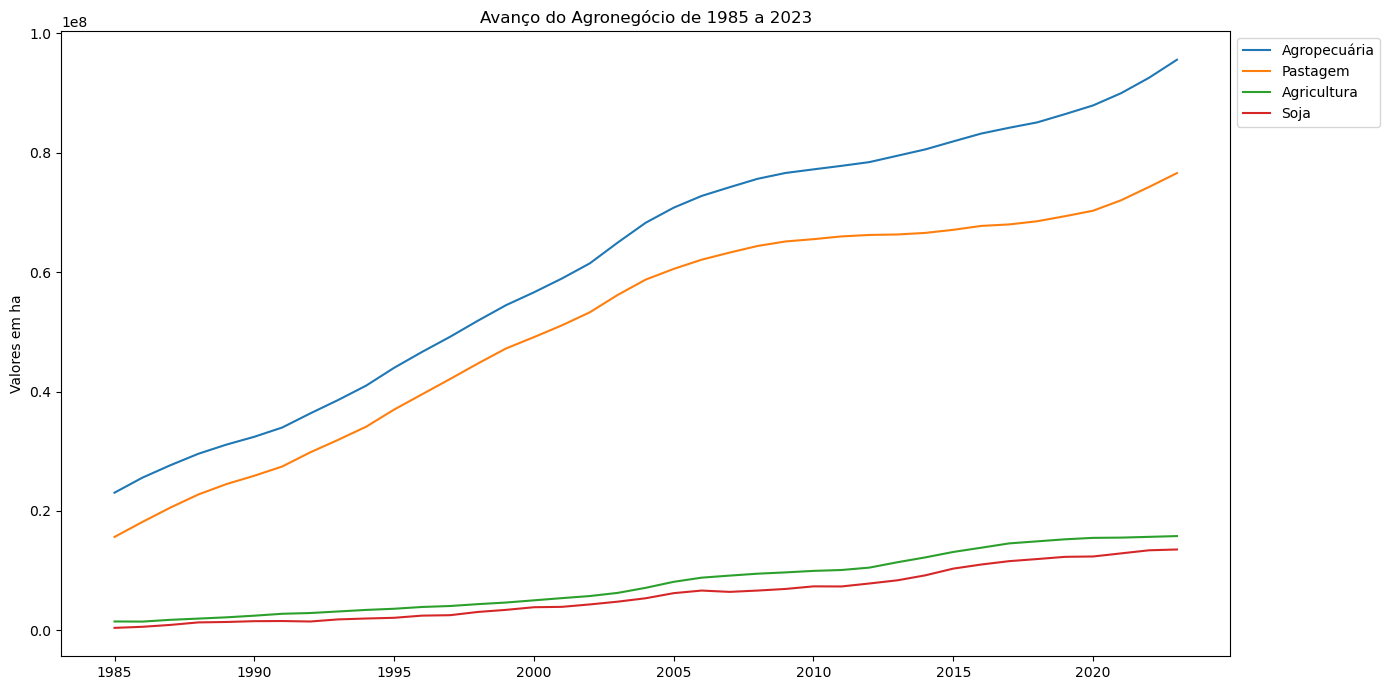

In [8]:
plt.figure(figsize=(14, 7))

# Plota os dados de cada coluna como uma série ao longo do tempo
for column in agricola.columns:  
    if column != 'Year':  # Exclui a coluna 'Year' ara plotar apenas os valores
        plt.plot(agricola['Year'], agricola[column], label=column)

plt.title('Avanço do Agronegócio de 1985 a 2023')
plt.xlabel('')
plt.ylabel('Valores em ha')

plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

O avanço do agronegócio está ligado principalmente ao avanço da pastagem (gado) e da soja, já o avanço da fronteira agrícola, temos que a soja representa quase a totalidade em toda a série temporal.


Crescimento em porcentagem:

In [9]:
# Extraindo os valores da coluna 'Agropecuária'
valores = agricola['Agropecuária']

# Crescimento Simples
valor_inicial = valores.iloc[0]
valor_final = valores.iloc[-1]
crescimento_simples = (valor_final - valor_inicial) / valor_inicial * 100

# Crescimento Composto
n_periodos = len(valores) - 1
crescimento_composto = (valor_final / valor_inicial) ** (1 / n_periodos) - 1
crescimento_composto_percentual = crescimento_composto * 100

print(f'Crescimento Simples: {crescimento_simples:.2f}%')
print(f'Crescimento Composto Anual: {crescimento_composto_percentual:.2f}%')

Crescimento Simples: 314.36%
Crescimento Composto Anual: 3.81%


A área do agronegócio teve um crescimento anual médio de 3,81%, levando a uma área mais do que quadruplicada entre 1985 a 2023 (ficou mal formulado essa frase mas acho q dá para entender)

## Mineração e Urbanização

In [10]:
# Seleciona as linhas para um novo df sobre agricultura
mineracao = cobertura.iloc[24:26].reset_index(drop = True)

# Transpor o df
mineracao = mineracao.transpose()

# Indices corretos
mineracao = mineracao.reset_index(drop=True)

# Primeira linha nome das colunas
mineracao.columns = mineracao.iloc[0]

# Remova a primeira linha e reset do index
mineracao = mineracao.drop(0).reset_index(drop=True)

# Nova coluna com os anos
mineracao['Year'] = list(range(1985, 2024))


display(mineracao)

,4.2. Urban Area,4.3. Mining,Year
0,299286.636791,29963.739494,1985
1,343247.623486,35190.653535,1986
2,356631.956449,45713.18003,1987
3,370700.859131,56952.576709,1988
4,384552.591393,69896.555048,1989
5,397703.223806,77328.934863,1990
6,410993.663014,81321.595291,1991
7,416237.710712,87585.881317,1992
8,420313.116251,89760.391141,1993
9,423818.690835,91398.910212,1994


In [11]:
# Renomear para pt-br
nome_novo = {
    '4.2. Urban Area': 'Área Urbana',
    '4.3. Mining': 'Mineração'
}

# Renomear as colunas
mineracao.rename(columns=nome_novo, inplace=True)
print(mineracao.head())

0    Área Urbana     Mineração  Year
0  299286.636791  29963.739494  1985
1  343247.623486  35190.653535  1986
2  356631.956449   45713.18003  1987
3  370700.859131  56952.576709  1988
4  384552.591393  69896.555048  1989


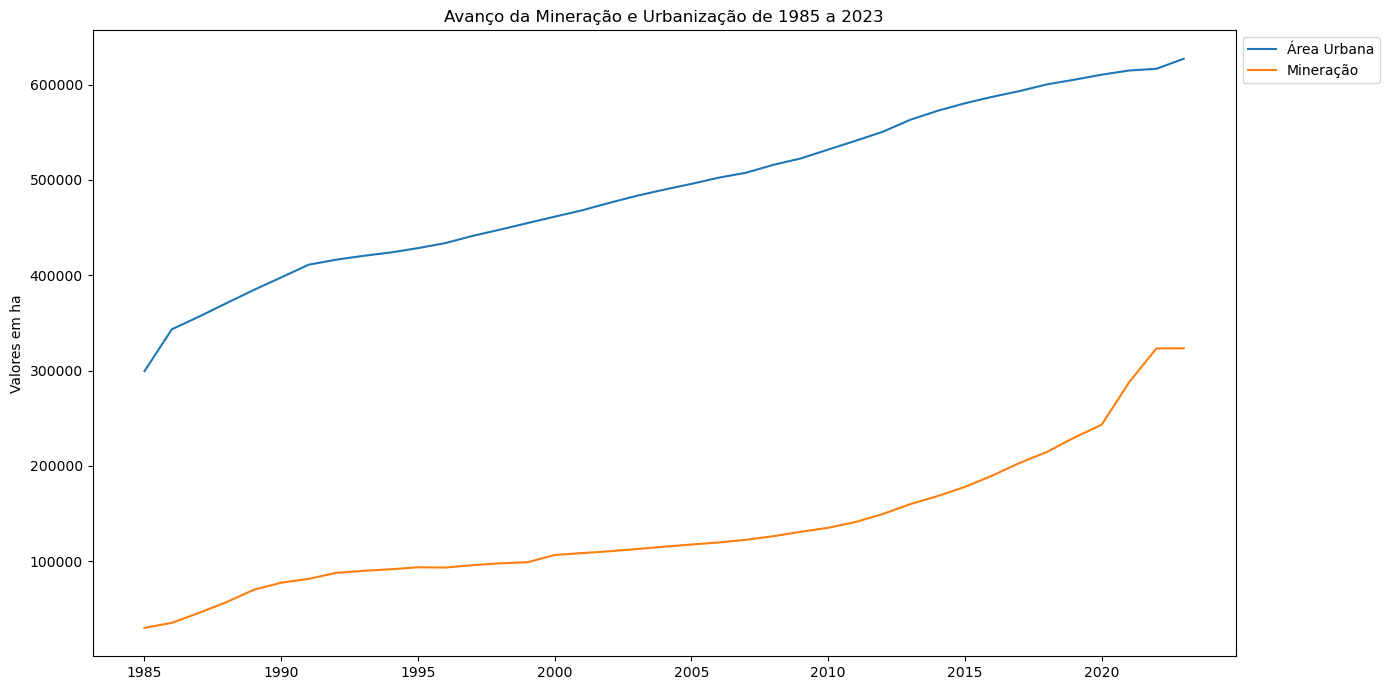

In [12]:
plt.figure(figsize=(14, 7))

# Plota os dados de cada coluna como uma série ao longo do tempo
for column in mineracao.columns:  
    if column != 'Year':  # Exclui a coluna 'Year' para plotar apenas os valores
        plt.plot(mineracao['Year'], mineracao[column], label=column)

plt.title('Avanço da Mineração e Urbanização de 1985 a 2023')
plt.xlabel('')
plt.ylabel('Valores em ha')

plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

Normalmente, a mineração na Amazônia Legal, incluindo nas terras indígenas, ocorre após o desmatamento.

"A mineração ilegal na Amazônia está muito ligada ao desmatamento, porque é preciso desmatar a floresta para depois explorar o solo", afirma Guilherme Augusto Verola Mataveli, pós-doutorando na Divisão de Observação da Terra e Geoinformática do Inpe.

https://www.brasildefato.com.br/2023/02/03/mineracao-em-terras-indigenas-da-amazonia-aumentou-1-217-nos-ultimos-35-anos#:~:text=Normalmente%2C%20a%20minera%C3%A7%C3%A3o%20na%20Amaz%C3%B4nia,explorar%20o%20solo%22%2C%20afirma.

In [13]:
# Extraindo os valores das colunas 'Mineração' e 'Área Urbana'
colunas = ['Mineração', 'Área Urbana']

# Iterando a fim de ter os cresimentos de cada variável
for coluna in colunas:
    valores = mineracao[coluna]

    # Crescimento Simples
    valor_inicial = valores.iloc[0]
    valor_final = valores.iloc[-1]
    crescimento_simples = (valor_final - valor_inicial) / valor_inicial * 100

    # Crescimento Composto
    n_periodos = len(valores) - 1
    crescimento_composto = (valor_final / valor_inicial) ** (1 / n_periodos) - 1
    crescimento_composto_percentual = crescimento_composto * 100

    print(f'{coluna}:')
    print(f'Crescimento Simples: {crescimento_simples:.2f}%')
    print(f'Crescimento Composto Anual: {crescimento_composto_percentual:.2f}%')

Mineração:
Crescimento Simples: 978.98%
Crescimento Composto Anual: 6.46%
Área Urbana:
Crescimento Simples: 109.54%
Crescimento Composto Anual: 1.97%


O crescimento da mineração (6,46%a.a) foi maior que da agropecuária (3,81%a.a) e da urbanização (1,97%a.a).

## Em dados absolutos

In [14]:
final = pd.merge(agricola, mineracao, on='Year')

display(final)
print(final.columns)

,Agropecuária,Pastagem,Agricultura,Soja,Year,Área Urbana,Mineração
0,23066525.403299,15654503.233577,1492862.416099,420236.547602,1985,299286.636791,29963.739494
1,25585422.654563,18168169.928696,1472194.715813,601016.69037,1986,343247.623486,35190.653535
2,27666435.656491,20572366.347344,1770041.52205,916096.604567,1987,356631.956449,45713.18003
3,29584077.876798,22768106.487931,1972889.756482,1337363.878133,1988,370700.859131,56952.576709
4,31112410.638558,24498867.34673,2186508.229105,1406900.80624,1989,384552.591393,69896.555048
5,32426646.420329,25899027.347582,2461228.407383,1541686.218977,1990,397703.223806,77328.934863
6,33982372.574223,27451584.904673,2781701.033478,1566196.247096,1991,410993.663014,81321.595291
7,36340063.210319,29818971.640316,2906891.473378,1487197.5791,1992,416237.710712,87585.881317
8,38588645.20378,31915064.2092,3166819.555674,1839390.689069,1993,420313.116251,89760.391141
9,40995854.790921,34115498.913758,3426811.497653,1988033.756496,1994,423818.690835,91398.910212


Index(['Agropecuária', 'Pastagem', 'Agricultura', 'Soja', 'Year',
       'Área Urbana', 'Mineração'],
      dtype='object', name=0)


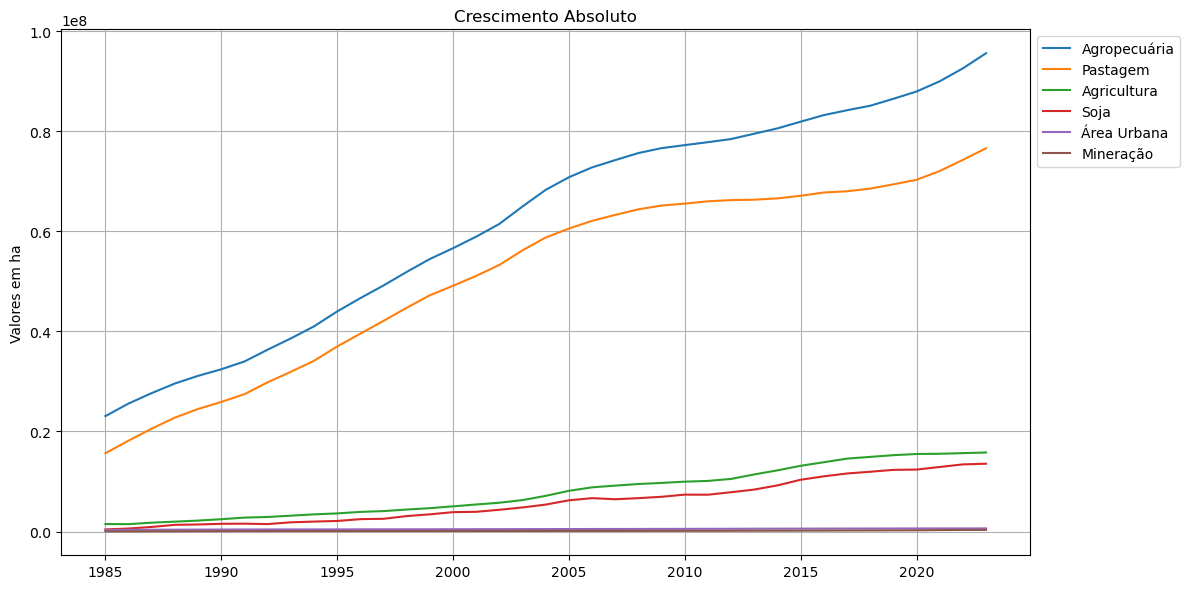

In [15]:
# Plotando o DataFrame 'final' com valores percentuais
plt.figure(figsize=(12, 6))

plt.plot(final['Year'], final['Agropecuária'], label='Agropecuária')
plt.plot(final['Year'], final['Pastagem'], label='Pastagem')
plt.plot(final['Year'], final['Agricultura'], label='Agricultura')
plt.plot(final['Year'], final['Soja'], label='Soja')
plt.plot(final['Year'], final['Área Urbana'], label='Área Urbana')
plt.plot(final['Year'], final['Mineração'], label='Mineração')

plt.title('Crescimento Absoluto')
plt.xlabel('')
plt.ylabel('Valores em ha')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.tight_layout()
plt.show()

### Valores relativos

0 Agropecuária  Pastagem Agricultura      Soja  Year Área Urbana Mineração
0          1.0       1.0         1.0       1.0  1985         1.0       1.0
1     1.109201  1.160571    0.986156  1.430187  1986    1.146886  1.174441
2     1.199419   1.31415     1.18567  2.179955  1987    1.191607  1.525617
3     1.282555  1.454413    1.321548  3.182407  1988    1.238615  1.900717
4     1.348812  1.564973    1.464641  3.347878  1989    1.284897  2.332705


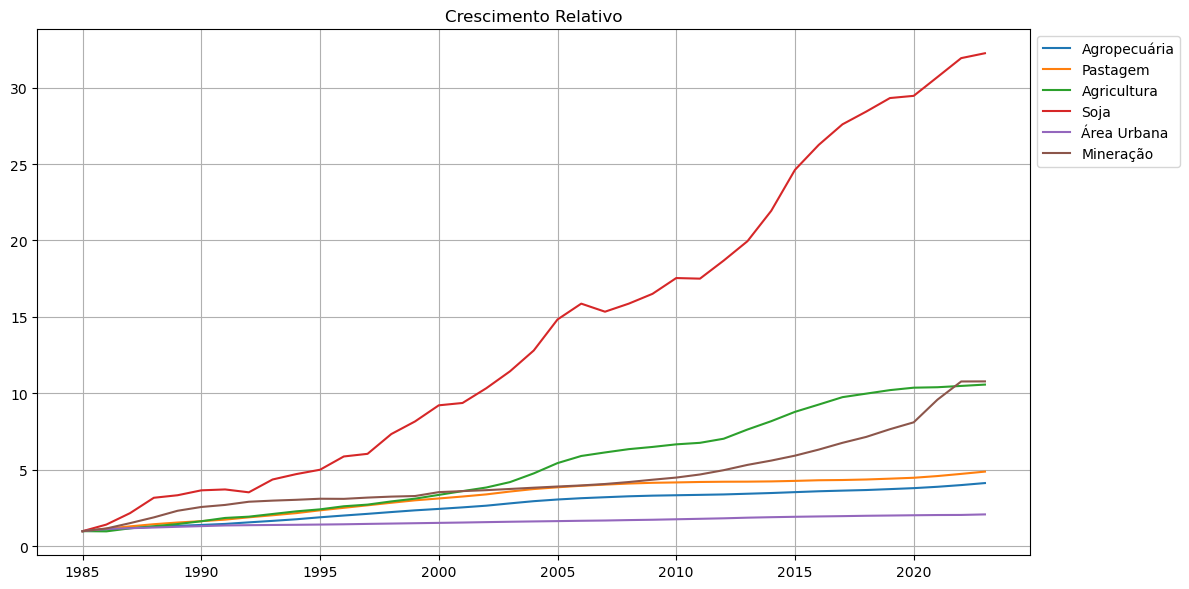

In [16]:
# Criando uma cópia do DataFrame para não modificar o original
final_percentage = final.copy()

# Selecionando as colunas (exceto 'Year') para a transformação
cols_to_transform = final.columns.difference(['Year'])

# Para cada coluna (exceto 'Year'), o primeiro valor será 1 e o último será o valor original
for col in cols_to_transform:
    first_value = final[col].iloc[0]
    last_value = final[col].iloc[-1]
    final_percentage[col] = final[col] / first_value  # Normalizando com base no primeiro ano

# Verificar se está arrumado
print(final_percentage.head())

# Plotando o DataFrame 'final' com valores percentuais
plt.figure(figsize=(12, 6))

plt.plot(final_percentage['Year'], final_percentage['Agropecuária'], label='Agropecuária')
plt.plot(final_percentage['Year'], final_percentage['Pastagem'], label='Pastagem')
plt.plot(final_percentage['Year'], final_percentage['Agricultura'], label='Agricultura')
plt.plot(final_percentage['Year'], final_percentage['Soja'], label='Soja')
plt.plot(final_percentage['Year'], final_percentage['Área Urbana'], label='Área Urbana')
plt.plot(final_percentage['Year'], final_percentage['Mineração'], label='Mineração')

plt.title('Crescimento Relativo')
plt.xlabel('')
plt.ylabel('')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.tight_layout()
plt.show()

A soja aumentou em área em  aproximadamente 30 vezes! 

Interessante perceber que a Área Urbana aumentou somente 2 vezes


In [17]:
# Extraindo os valores das colunas 'Mineração' e 'Área Urbana'
colunas = ['Agropecuária', 'Pastagem', 'Agricultura', 'Soja',
       'Área Urbana', 'Mineração']

# Iterando a fim de ter os cresimentos de cada variável
for coluna in colunas:
    valores = final[coluna]

    # Crescimento Simples
    valor_inicial = valores.iloc[0]
    valor_final = valores.iloc[-1]
    crescimento_simples = (valor_final - valor_inicial) / valor_inicial * 100

    # Crescimento Composto
    n_periodos = len(valores) - 1
    crescimento_composto = (valor_final / valor_inicial) ** (1 / n_periodos) - 1
    crescimento_composto_percentual = crescimento_composto * 100

    print(f'{coluna}:')
    print(f'Crescimento Simples: {crescimento_simples:.2f}%')
    print(f'Crescimento Composto Anual: {crescimento_composto_percentual:.2f}%')

Agropecuária:
Crescimento Simples: 314.36%
Crescimento Composto Anual: 3.81%
Pastagem:
Crescimento Simples: 389.25%
Crescimento Composto Anual: 4.27%
Agricultura:
Crescimento Simples: 958.05%
Crescimento Composto Anual: 6.40%
Soja:
Crescimento Simples: 3124.04%
Crescimento Composto Anual: 9.57%
Área Urbana:
Crescimento Simples: 109.54%
Crescimento Composto Anual: 1.97%
Mineração:
Crescimento Simples: 978.98%
Crescimento Composto Anual: 6.46%


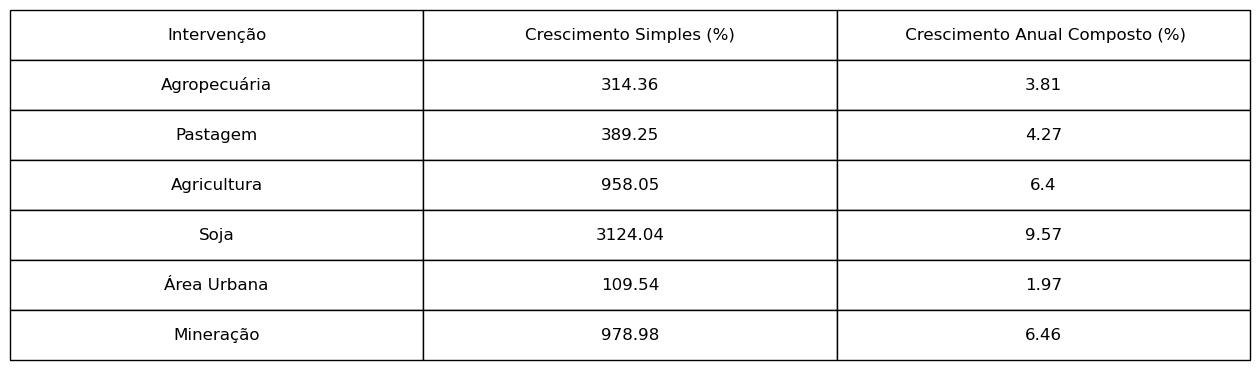

In [22]:
# Dados p/ tabela
dados = {
    'Intervenção': ['Agropecuária', 'Pastagem', 'Agricultura', 'Soja', 'Área Urbana', 'Mineração'],
    'Crescimento Simples (%)': [314.36, 389.25, 958.05, 3124.04, 109.54, 978.98],
    ' Crescimento Anual Composto (%)': [3.81, 4.27, 6.40, 9.57, 1.97, 6.46]
}

# Criando um df
df = pd.DataFrame(dados)

# Criando a tabela
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')  

# Criando a tabela com o df
tabela = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

tabela.scale(2, 3)
tabela.set_fontsize(12)
plt.show()
